In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
import glob
from matplotlib import pyplot as plt

In [2]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('Azu/trocr-handwritten-math') # number of params corresponds to small model

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


C:\Users\Chris Wendler\AppData\Local\pypoetry\Cache\virtualenvs\ocr-ensemble-EUJa140X-py3.9\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


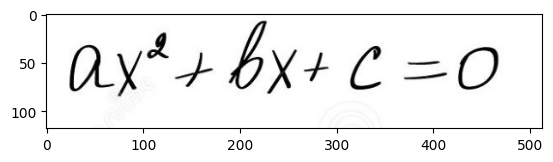

a g ^ { 2 } + b x + c = 0


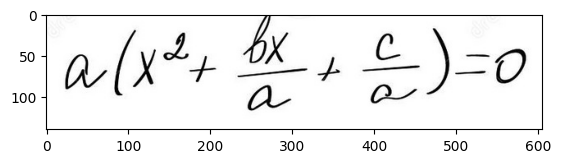

a ( x + b ) = \frac { f ( x ) } { 2 }


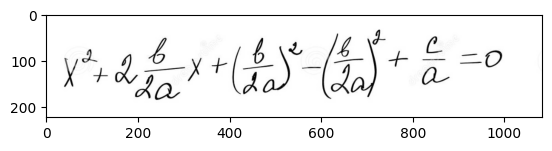

\alpha _ { 1 } ^ { 2 } \frac { 2 a _ { 3


In [3]:
for fname in glob.glob('../data/examples/handwritten-math/*'):
    image = Image.open(fname).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    plt.imshow(image)
    plt.show()
    print(generated_text)

In [5]:
!gdown https://drive.google.com/uc?id=1w7SDlCc6Dv4_rniIZE7FJMdx0QamZ3O4 -O ../data/handwritten-math/CHOHME-subsetof-test-2014.tar

Downloading...
From: https://drive.google.com/uc?id=1w7SDlCc6Dv4_rniIZE7FJMdx0QamZ3O4
To: C:\Users\Chris Wendler\Documents\git\2023\OCR-ensemble\data\handwritten-math\CHOHME-subsetof-test-2014.tar

  0%|          | 0.00/8.14M [00:00<?, ?B/s]
 32%|###2      | 2.62M/8.14M [00:00<00:00, 26.0MB/s]
100%|##########| 8.14M/8.14M [00:00<00:00, 55.0MB/s]


In [6]:
!tar -tvf ../data/handwritten-math/CHOHME-subsetof-test-2014.tar -C ../data/handwritten-math/

drwxrwxrwx  0 0      0           0 Apr 09 20:17 CHOHME-subsetof-test-2014/
-rwxrwxrwx  0 0      0        9881 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_0.png
-rwxrwxrwx  0 0      0        9341 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_1.png
-rwxrwxrwx  0 0      0       10975 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_10.png
-rwxrwxrwx  0 0      0       10891 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_11.png
-rwxrwxrwx  0 0      0       13305 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_12.png
-rwxrwxrwx  0 0      0        9628 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_13.png
-rwxrwxrwx  0 0      0       16796 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_14.png
-rwxrwxrwx  0 0      0       12903 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_15.png
-rwxrwxrwx  0 0      0       12204 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_16.png
-rwxrwxrwx  0 0      0       12985 Apr 09 20:17 CHOHME-subsetof-test-2014/18_em_17.png
-rwxrwxrwx  0 0      0       12049 Apr 09 20:17 CHOHME-su

C:\Users\Chris Wendler\AppData\Local\pypoetry\Cache\virtualenvs\ocr-ensemble-EUJa140X-py3.9\lib\site-packages\transformers\generation\utils.py:1288: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


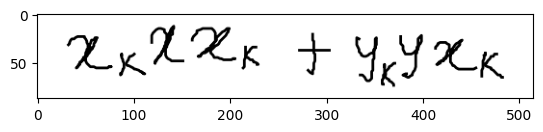

x _ { 1 } - 2 x _ { 2 } = 2 x _ { 3


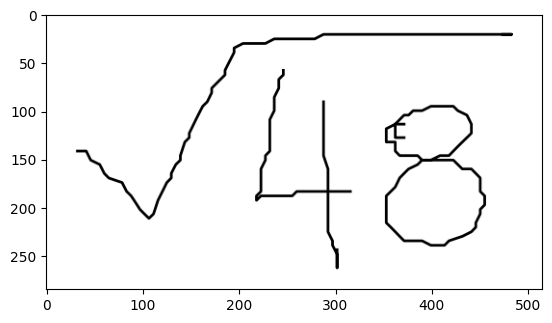

\alpha _ { \sqrt { 1 } \frac { 2 } { \sq


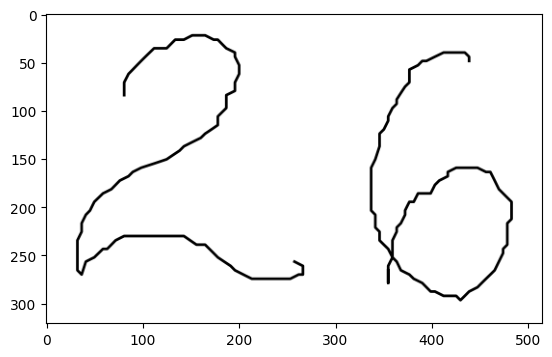

\lim _ { n \rightarrow \infty } f _ { n } (


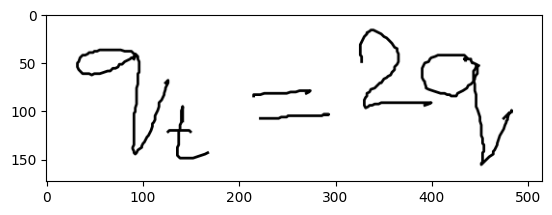

\phi _ { \phi _ { g } } = \frac { 2 \pi


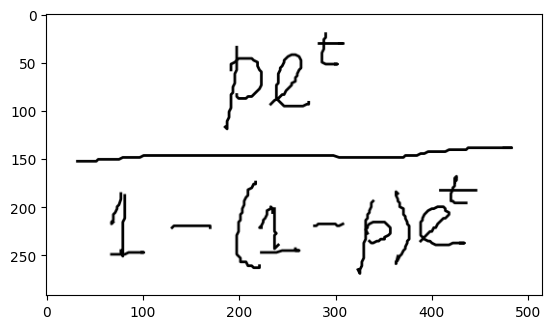

\frac { \sin B } { \cos B + \cos C }


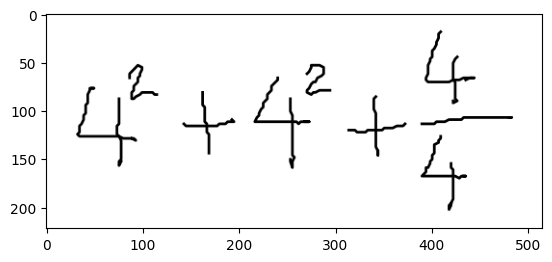

\frac { a ^ { 2 } - 4 a ^ { 3 } - 4 a


KeyboardInterrupt: 

In [7]:
for fname in glob.glob('../data/handwritten-math/CHOHME-subsetof-test-2014/*.png'):
    image = Image.open(fname).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    plt.imshow(image)
    plt.show()
    print(generated_text)